In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np
import pandas as pd

# Accuracy

In [2]:
accuracy5 = {}
accuracy5["ember (secml)"] = [0.9806002928257687, 0.7822108345534406]
accuracy5["malconv"] = [0.9849926793557833, 0.9809663250366032]
accuracy5["filepaths"] = [0.9771229868228404, 0.9771229868228404]
accuracy5["emulation"] = [0.9659590043923866, 0.7900805270863837]
accuracy5["ember"] = [1.0, 0.8978770131771596]
accuracy5["ember & emulation"] = [1.0, 0.9560761346998536]
accuracy5["ember & filepaths & emulation"] = [0.988103953147877, 0.9842606149341142]
accuracy5["all"] = [0.988103953147877, 0.9842606149341142]
accuracy5 = pd.DataFrame(accuracy5, index=["original", "adversarial"])

In [3]:
accuracy10 = {}
accuracy10["ember (secml)"] = [0.981059212945936, 0.7774917248988599]
accuracy10["malconv"] = [0.9852887090842222, 0.9803236484001471]
accuracy10["filepaths"] = [0.9766458256712026, 0.9766458256712026]
accuracy10["emulation"] = [0.964509010665686, 0.7892607576314822]
accuracy10["ember"] = [1.0, 0.8832291283560132]
accuracy10["ember & emulation"] = [1.0, 0.9554983449797719]
accuracy10["ember & filepaths & emulation"] = [0.9874954027215889, 0.9832659065833027]
accuracy10["all"] = [0.9874954027215889, 0.9832659065833027]
accuracy10 = pd.DataFrame(accuracy10, index=["original", "adversarial"])

In [4]:
accuracy15 = {}
accuracy15["ember (secml)"] = [0.9814780514910169, 0.7193924800889053]
accuracy15["malconv"] = [0.9855528801629931, 0.9803667345804778]
accuracy15["filepaths"] = [0.9781441007593998, 0.9781441007593998]
accuracy15["emulation"] = [0.9955547323578441, 0.9764771253935914]
accuracy15["ember"] = [1.0, 0.8705315799222079]
accuracy15["ember & emulation"] = [1.0, 0.9554983449797719]
accuracy15["ember & filepaths & emulation"] = [0.9887016114095203, 0.9851824411928135]
accuracy15["all"] = [0.9887016114095203, 0.9851824411928135]
accuracy15 = pd.DataFrame(accuracy15, index=["original", "adversarial"])

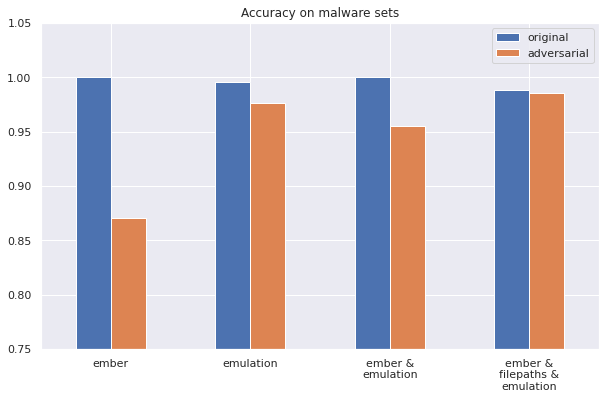

In [43]:
df = accuracy15[["ember", "emulation", "ember & emulation", "ember & filepaths & emulation"]]
ax = df.transpose().plot(kind="bar", figsize=(10,6))
#ax.legend(loc="lower center")
ax.legend(loc=1)
ax.set_title("Accuracy on malware sets")
ax.set_ylim([0.75, 1.05])
_ = ax.set_xticklabels([x.replace("& ", "&\n") for x in df.columns.tolist()], rotation=0)

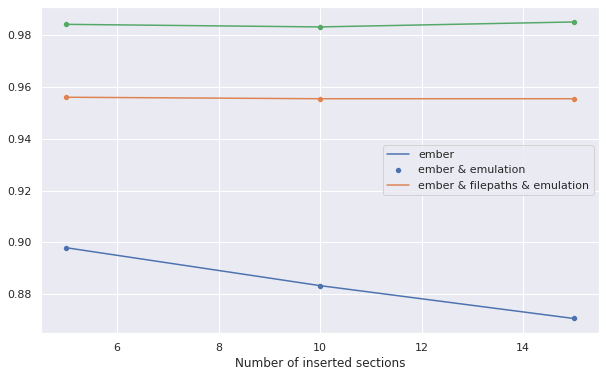

In [83]:
fig, ax = plt.subplots(figsize=(10,6))
modules = ["ember", "ember & emulation", "ember & filepaths & emulation"]
for m in modules:
    sns.lineplot(y=[x[m][1] for x in [accuracy5, accuracy10, accuracy15]], x = [5,10,15], ax=ax)
    sns.scatterplot(y=[x[m][1] for x in [accuracy5, accuracy10, accuracy15]], x = [5,10,15], ax=ax)
#plt.ylim([0.8, 1])
#plt.yscale("log")
plt.legend(modules, loc="center right")
_ = plt.xlabel("Number of inserted sections")

In [100]:
section_accuracies_adv = pd.DataFrame(np.vstack([accuracy5.values[1,:], accuracy10.values[1,:], accuracy15.values[1,:]]), 
                        columns=accuracy15.columns, 
                        index=[5,10,15])

In [104]:
section_accuracies_adv.columns

Index(['ember (secml)', 'malconv', 'filepaths', 'emulation', 'ember',
       'ember & emulation', 'ember & filepaths & emulation', 'all'],
      dtype='object')

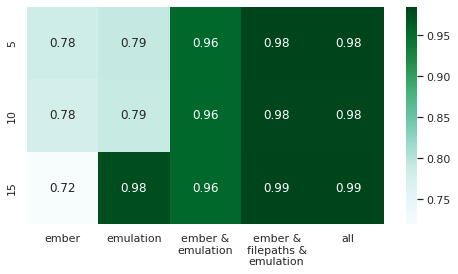

In [148]:
_, ax = plt.subplots(figsize=(8,4))
cols = ['ember (secml)', 'emulation', 'ember & emulation', 'ember & filepaths & emulation', 'all']
#cols = ['ember (secml)', 'emulation', 'ember & emulation', 'ember & filepaths & emulation', 'all']
df = section_accuracies_adv[cols]
ax = sns.heatmap(df, annot=True, ax=ax, cmap="BuGn")
_ = ax.set_xticklabels([x.replace("& ", "&\n").replace(" (secml)","") for x in df.columns.tolist()], rotation=0)


In [138]:
df

,ember (secml),emulation,ember & emulation,ember & filepaths & emulation,all
5,0.782211,0.790081,0.956076,0.984261,0.984261
10,0.777492,0.789261,0.955498,0.983266,0.983266
15,0.719392,0.976477,0.955498,0.985182,0.985182


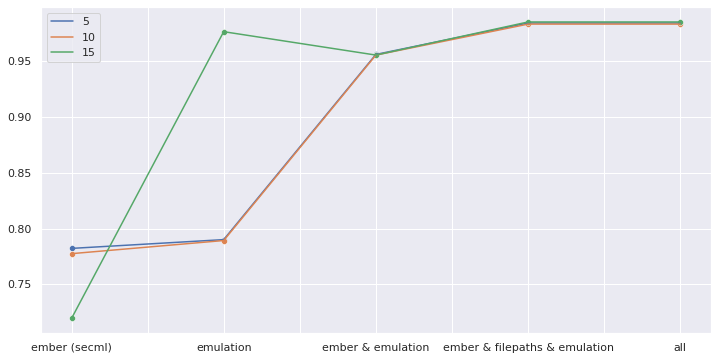

In [139]:
ax = df.transpose().plot(kind="line", figsize=(12,6))
ax = sns.scatterplot(y=df.values[0,:], x=df.columns, ax=ax)
ax = sns.scatterplot(y=df.values[1,:], x=df.columns, ax=ax)
ax = sns.scatterplot(y=df.values[2,:], x=df.columns, ax=ax)
#_ = ax.set_xticklabels([x.replace("& ", "&\n") for x in df.columns.tolist()], rotation=0)

# Detection and evasion rates

In [5]:
evasive_samples_ember = {}
columns = ["bening orig", "benign adversarial", "difference", "ratio"]
evasive_samples_ember["ember (secml)"] = 100, 1515, 1415, 26.21
evasive_samples_ember["ember"] = 0, 699, 699, 12.95
evasive_samples_ember["malconv"] = 78, 106, 28, 0.52
evasive_samples_ember["emulation"] = 24, 127, 103, 1.91
evasive_samples_ember["ember_emulation"] = 5, 236, 231, 4.28
evasive_samples_ember["ember_filepaths_emulation"] = 61, 80, 19, 0.35
evasive_samples_ember["all"] = 61, 80, 19, 0.35

evasive_samples_ember = pd.DataFrame(evasive_samples_ember.values(), columns=columns, index=evasive_samples_ember.keys())
evasive_samples_ember

,bening orig,benign adversarial,difference,ratio
ember (secml),100,1515,1415,26.21
ember,0,699,699,12.95
malconv,78,106,28,0.52
emulation,24,127,103,1.91
ember_emulation,5,236,231,4.28
ember_filepaths_emulation,61,80,19,0.35
all,61,80,19,0.35


In [6]:
evasive_samples_malconv = {}
evasive_samples_malconv["malconv"] = [0, 2376, 2376, 59.06]
evasive_samples_malconv["ember"] = [290, 413, 123, 3.06]
evasive_samples_malconv["emulation"] = [188, 271, 83, 2.06]
evasive_samples_malconv["ember_emulation"] = [215, 305, 90, 2.24]
evasive_samples_malconv["malconv_emulation"] = [181, 295, 114, 2.83]
evasive_samples_malconv["malconv_ember"] = [306, 393, 87, 2.16]
evasive_samples_malconv["ember_filepaths_emulation"] = [223, 233, 10, 0.25]
evasive_samples_malconv["malconv_filepaths_emulation"] = [245, 249, 4, 0.10]
evasive_samples_malconv["malconv_ember_emulation"] = [220, 294, 74, 1.84]
evasive_samples_malconv["all"] = [223, 233, 10, 0.25]

columns = ["bening orig", "benign adversarial", "difference", "ratio"]
evasive_samples_malconv = pd.DataFrame(evasive_samples_malconv.values(), columns=columns, index=evasive_samples_malconv.keys())
evasive_samples_malconv

,bening orig,benign adversarial,difference,ratio
malconv,0,2376,2376,59.06
ember,290,413,123,3.06
emulation,188,271,83,2.06
ember_emulation,215,305,90,2.24
malconv_emulation,181,295,114,2.83
malconv_ember,306,393,87,2.16
ember_filepaths_emulation,223,233,10,0.25
malconv_filepaths_emulation,245,249,4,0.10
malconv_ember_emulation,220,294,74,1.84
all,223,233,10,0.25


In [10]:
def plot_evasive_samples(evasive_samples_ember, evasive_samples_malconv, ax=None, cmap=None):
    data2 = evasive_samples_malconv["difference"].transpose()[["malconv", "malconv_emulation", "malconv_filepaths_emulation"]]
    data = evasive_samples_ember["difference"].transpose()[["ember (secml)", "ember_emulation", "ember_filepaths_emulation"]]
    df = pd.DataFrame(np.vstack([data.values, data2.values]), 
                columns=["Model", "Model & Emulation", "Model & Emulation & Filepaths"], 
                index=["MalConv", "Ember GBDT"])
    ax = df.transpose().plot(kind="bar", ax=ax, cmap=cmap)
    ax.set_yscale("log")
    ax.legend(title="Model:")
    ax.set_title("Evasive samples", fontsize=14)
    ax.set_ylabel("Count (log)")
    ax.set_xticklabels([x.replace(" & ", " &\n").replace(" (secml)","") for x in df.columns.tolist()], rotation=0, fontsize=12)

In [13]:
def plot_detection_rates(ax=None, cmap=None):
    names = ["Model", "Model & Emulation", "Model & Emulation & Filepaths", "All"]
    #mnames = ["GBDT", "GBDT & Emulation", "GBDT & Emulation & Filepaths", "All"]
    mstats = [0.40939597315436244, 0.926671638081034, 0.9381058911260254, 0.9420830226199354]
    #enames = ["GBDT", "GBDT & Emulation", "GBDT & Emulation & Filepaths", "All"]
    estats = 0.7193924800889053, 0.9562882015187998, 0.9851824411928135, 0.9851824411928135

    df = pd.DataFrame([mstats, estats],columns=names, index=["MalConv","Ember GBDT"])
    df = df[["Model", "Model & Emulation", "Model & Emulation & Filepaths"]]

    ax = df.transpose().plot(kind="bar", ax=ax, cmap=cmap)
    ax.set_title("Detection rates on adversarial set",fontsize=14)
    ax.legend(title="Model:")
    _ = ax.set_xticklabels([x.replace("& ", "&\n") for x in df.columns.tolist()], rotation=0, fontsize=12)

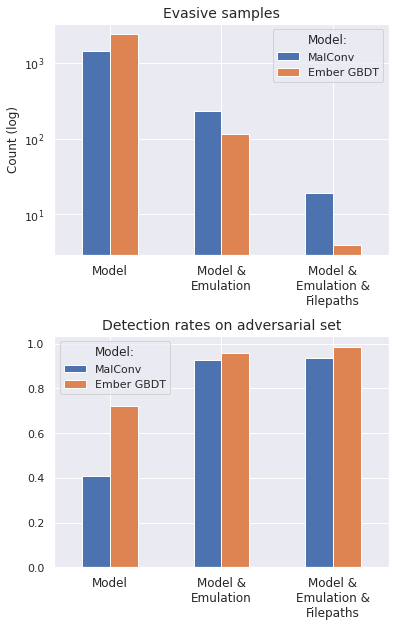

In [14]:
fig, ax = plt.subplots(2,1, figsize=(6,10))
#cmaps = ["RdGy", "seismic"]
#cmaps = ["PiYG", "RdYlGn"]
cmaps = [None, None]
plot_evasive_samples(evasive_samples_ember, evasive_samples_malconv, ax=ax[0], cmap=cmaps[0])
plot_detection_rates(ax=ax[1], cmap=cmaps[1])
plt.subplots_adjust(hspace=0.35)